# Let's Get That Data!

In [1]:
#First, The Imports
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# Every returned Out[] is displayed, not just the last one. (Thanks NaRae!)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# the key variables
consumerKey = "XXXXXXXX"
consumerSecret ="XXXXXXXXX"

In [3]:
#authentication
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

#connecting to Twitter API
api = tweepy.API(auth)

In [4]:
# this is helpful for later but I need to read in the .csv files so I can append them later
#tcat = pd.read_csv(r'cat_tweets.csv')
#tdog = pd.read_csv(r'dog_tweets.csv')
filepath = "/Users/Margaret/Documents/Data_Science/Project_Margaret/"

In [5]:
#getting cat and dog search results
#NOTE: The dog neologisms I will compare: doggo and doge
#NOTE: The cat neologisms I will compare: kitteh and toebeans
rDog = api.search(q='%23dog')
rDogs = api.search(q='%23dogs')
rDoggo = api.search(q='%23doggo')
rDoge = api.search(q='%23doge')
rCat = api.search(q='%23cat')
rCats = api.search(q='%23cats')
rToeBeans = api.search(q='%23toebeans')
rKitteh = api.search(q='%23kitteh')

In [6]:
#Get the first 1000 items based on the search query
for tweet in tweepy.Cursor(api.search, q='%23dog').items(1000):
    rDog.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23doggo').items(1000):
    rDoggo.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23doge').items(1000):
    rDoge.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23cat').items(1000):
    rCat.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23toebeans').items(1000):
    rToeBeans.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23kitteh').items(1000):
    rKitteh.append(tweet)

In [7]:
#Adding in the plurals
for tweet in tweepy.Cursor(api.search, q='%23dogs').items(1000):
    rDogs.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23cats').items(1000):
    rCats.append(tweet)

In [9]:
#Verify the number of items returned
len(rDog)
len(rDogs)
len(rDoge)
len(rDoggo)
len(rCat)
len(rCats)
len(rToeBeans)
len(rKitteh)

1015

1015

1015

1015

1015

1015

79

147

### Even already it is interesting to see that ToeBeans and Kitteh are already returning a lot less results. This likely means that they are fairly unpopular terms (at least to tag your tweet with) which is interesting.  
#### This also means that if this trend continues (which it has been up to this point), it is already clear that Dogs get more posts than cats.
  
### Below is an example of a tweet as well as some additional information about it. This is the only tweet I will show, in attempts to not go against the data-sharing agreement. However, this is what the data I'm working with looks like.

In [10]:
#this is an example of a tweet
tweet1 = rDog[1] #get the data of the first tweet.

#then, print tweet. 
print(tweet1.text)

#other additional info about the tweet for reference
tweet1.lang                    #the tweet is in English
tweet1.user.screen_name        #this is the username
tweet1.user.description        #self description of user by user posted on profile
tweet1.created_at              #date and time tweet was created
tweet1.id                      #Tweet ID #
tweet1.favorite_count          #how many likes the tweet received (in this case 0)

RT @collectivewhim: How COOL is this Robot #dog?! If your #kid is into #tech they will♥programming their own #pet! #Christmas #Toys #Coding…


'en'

'MoneySvgParent'

'Mom. Blogger. Writer. Social Media Influencer. Speaker. Featuring Family Travel. Food. Twitter Parties.'

datetime.datetime(2017, 11, 2, 16, 25, 41)

926123155495714817

0

In [11]:
# this is a function found here: http://blog.impiyush.com/2015/03/data-analysis-using-twitter-api-and.html
# I am using this to clean my data into a dataframe
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

In [12]:
#Do this funciton on the tweets, then connect the dataframes
dog_df = toDataFrame(rDog)
dogs_df = toDataFrame(rDogs)
doge_df = toDataFrame(rDoge)
doggo_df = toDataFrame(rDoggo)
cat_df = toDataFrame(rCat)
cats_df = toDataFrame(rCats)
toebeans_df = toDataFrame(rToeBeans)
kitteh_df = toDataFrame(rKitteh)

#Adding a column to say which hashtag it came from
dog_df['Hashtag'] = "dog"
dogs_df['Hashtag'] = "dogs" 
doge_df['Hashtag'] = "doge"
doggo_df['Hashtag'] = "doggo"
cat_df['Hashtag'] = "cat"
cats_df['Hashtag'] = "cats"
toebeans_df['Hashtag'] = "toebeans"
kitteh_df['Hashtag'] = "kitteh"

# now to combine into 2 larger ones, overall cat related, overall dog related
tcat_df = pd.concat([cat_df, cats_df, toebeans_df, kitteh_df])
tdog_df = pd.concat([dog_df, dogs_df, doge_df, doggo_df])

# NOTE: Still need to fogure out a good way to get rid of possible redundant tweets? 
#or maybe not? 
#I could potentially use that as a statistic? - which could be interesting. 
#either way, for now I'm going to leave it and make that decision a little later. 

#NOTE: I NEED TO CLEAN THIS DATA!! I was wondering why I was having so many issues. 
#The tweets themselves have a lot of special characters in them... commas and that is screwing with everything
#I think that the problem is really only in the twitter post itself and the bios. (people like to format fancy)
#The easiest way to do this would be to get rid of those, and restore the tweets by ID # later.

In [ ]:
#Method to get the tweets later
def lookup_tweets(tweet_IDs, api):
    full_tweets = []
    tweet_count = len(tweet_IDs)
    try:
        for i in range((tweet_count / 100) + 1):
            # Catch the last group if it is less than 100 tweets
            end_loc = min((i + 1) * 100, tweet_count)
            full_tweets.extend(
                api.statuses_lookup(id=tweet_IDs[i * 100:end_loc])
            )
        return full_tweets
    except tweepy.TweepError:
        print 'Something went wrong, quitting...'

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# do whatever it is to get por.TweetID - the list of all IDs to look up (which is my dataframe)

results = lookup_tweets(por.TweetID, api)

for tweet in results:
    if tweet:
        print tweet.text

In [15]:
#read in old csv files
tcat = pd.read_csv(filepath + 'cat_tweets.csv')
tdog = pd.read_csv(filepath + 'dog_tweets.csv')

In [14]:
#append the old and new csv
tcat_df.append(tcat, ignore_index=True)
tdog_df.append(tdog, ignore_index=True)

# Write out the DF as a new CSV file
tcat_df.to_csv('cat_tweets.csv')
tdog_df.to_csv('dog_tweets.csv')

,Hashtag,Unnamed: 0,tweetCreated,tweetFavoriteCt,tweetID,tweetRetweetCt,tweetSource,userID,userLocation,userName,userScreen,userTimezone
0,cat,NaN,2017-11-02 16:25:45,0,926123172952391680,2,Twitter for Android,887683582533050368,東京都,バイクが好き。,GIXXER150SF,None
1,cat,NaN,2017-11-02 16:25:43,0,926123163003564033,0,Twitter Web Client,900053252200439810,United States,Neda June,nedasadventures,Eastern Time (US & Canada)
2,cat,NaN,2017-11-02 16:25:30,0,926123107886292992,3,Twitter for iPad,534075133,,Mrs.Slate,grandmamosaysit,London
3,cat,NaN,2017-11-02 16:25:12,0,926123034083074048,1,Twitter for iPhone,1586984648,東京都港区➠➠➠沖縄県,ちゃお⊿やまだ,burokoly,None
4,cat,NaN,2017-11-02 16:25:04,0,926123001401110535,0,dlvr.it,1028955404,Issaquah WA,Issaquah Local,Issaquah_Buzz,Arizona
5,cat,NaN,2017-11-02 16:24:59,0,926122980517675008,0,Twitter for iPhone,3446833034,,いそだ ゆうき,1035Yuuki,None
6,cat,NaN,2017-11-02 16:24:52,0,926122950318624768,0,twittbot.net,3067728138,,kamaitachiCH,KamaitachiC,None
7,cat,NaN,2017-11-02 16:24:51,0,926122946069852162,0,twittbot.net,982608858,,お疲れネコ「ふぐりん」,mogusa_cat,None
8,cat,NaN,2017-11-02 16:24:50,0,926122941015785475,2,Twitter for Android,838830350910517249,,Syppah'sCuteCrochet,syppahscc,None
9,cat,NaN,2017-11-02 16:24:25,0,926122837114359808,3,Twitter for iPhone,869837773645029376,日本 東京,猫初心者とみつは（保護猫アミー）,minaminamommo,None


,Hashtag,Unnamed: 0,tweetCreated,tweetFavoriteCt,tweetID,tweetRetweetCt,tweetSource,userID,userLocation,userName,userScreen,userTimezone
0,dog,NaN,2017-11-02 16:25:43,0,926123163003564033,0,Twitter Web Client,900053252200439810,United States,Neda June,nedasadventures,Eastern Time (US & Canada)
1,dog,NaN,2017-11-02 16:25:41,0,926123155495714817,159,Twitter Web Client,894527666,"Houston, TX",Lisa Carey,MoneySvgParent,Central Time (US & Canada)
2,dog,NaN,2017-11-02 16:25:38,0,926123142225059840,0,IFTTT,898170001,,AIDAN O'NEILL,AONphoto,Amsterdam
3,dog,NaN,2017-11-02 16:25:26,0,926123093189365760,0,Tweet Eye - Tweet My Website,3028865068,,Laura Fornaro,duckwellsvintag,None
4,dog,NaN,2017-11-02 16:25:20,0,926123066597318656,0,twittbot.net,3165315667,,チョビの冒険,chobi_ad,None
5,dog,NaN,2017-11-02 16:25:08,0,926123018174324736,0,Hootsuite,714250615866589185,,"Allegro Homes, LLC",allegrohomesllc,None
6,dog,NaN,2017-11-02 16:25:07,0,926123013552132096,0,Statusbrew,3188752406,United States,A Tribe Called Pets™,TribeCalledPets,Pacific Time (US & Canada)
7,dog,NaN,2017-11-02 16:25:05,0,926123006648188928,0,dlvr.it,1028955404,Issaquah WA,Issaquah Local,Issaquah_Buzz,Arizona
8,dog,NaN,2017-11-02 16:24:57,0,926122972917784576,0,Twitter Web Client,4797624760,"Leicester, United Kingdom",Dryhound,DryHound,London
9,dog,NaN,2017-11-02 16:24:53,0,926122955825930240,1,Twitter for Android,21619317,"Hollywood, FL",JERRY 🐶,PITBULL95,America/Detroit


## Let's attempt some analysis.  
- again not completely sure how much I can share, so for now I'm only going to use the most recently gathered data. (The only rule is "as much as necissary but no more" and I don't really know what can be classified as "necessary").

In [16]:
# Trying a favorite vs. retweet comparison
cat_fav = tcat_df['tweetFavoriteCt'].mean()
cat_fav
cat_rt = tcat_df['tweetRetweetCt'].mean()
cat_rt
dog_fav = tdog_df['tweetFavoriteCt'].mean()
dog_fav
dog_rt = tdog_df['tweetRetweetCt'].mean()
dog_rt

0.4122340425531915

25.891843971631207

0.8524630541871921

34.29827586206896

,CATS,DOGS
Favorites,0.412234,NaN


,CATS,DOGS
Favorites,0.412234,NaN
Retweets,25.8918,NaN


,CATS,DOGS
Favorites,0.412234,0.852463
Retweets,25.8918,NaN


,CATS,DOGS
Favorites,0.412234,0.852463
Retweets,25.8918,34.2983


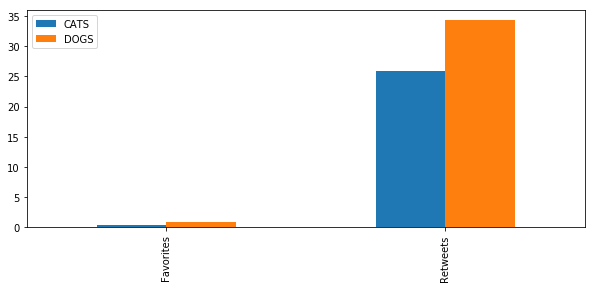

In [17]:
# okay, now for the bar graph
grouped = pd.DataFrame(columns = ['CATS', 'DOGS'])
grouped.set_value('Favorites', 'CATS', cat_fav)
grouped.set_value('Retweets', 'CATS', cat_rt)
grouped.set_value('Favorites', 'DOGS', dog_fav)
grouped.set_value('Retweets', 'DOGS', dog_rt)

grouped.plot.bar(figsize=(10,4))
plt.show()

### So in both cases, cats seem to be less in favor than dogs. Dog posts are both liked and retweeted more frequently on average than cat posts on Twitter. 
### It is also clear that retweeting is much more common than favoriting posts

## Let's look at location and find the most popular place for cat posts vs. dog posts

In [27]:
#Get rid of none values for the timezone
timecat_df = tcat_df[tcat_df.userTimezone.notnull()]
pop_cat = timecat_df.groupby('userLocation')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
pop_cat.head()

,tweetRetweetCt,tweetFavoriteCt
userLocation,,
,35.784375,0.490625
#Ohio,22.000000,0.000000
#OtabaeDay,3.000000,0.000000
(In Vancouver),2.000000,1.000000
1220 Wien,0.000000,4.000000


In [23]:
pop_cat.describe()

,tweetRetweetCt,tweetFavoriteCt
count,499.000000,499.000000
mean,21.765607,0.677381
std,160.991906,4.164365
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,5.000000,0.000000
max,3040.000000,74.500000


In [26]:
timedog_df = tdog_df[tdog_df.userTimezone.notnull()]
pop_dog = timedog_df.groupby('userLocation')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
pop_dog.head()

,tweetRetweetCt,tweetFavoriteCt
userLocation,,
,26.217742,0.46875
Arizona,3.000000,0.00000
Great Britain,0.000000,2.00000
In some place,1.500000,0.00000
Phoenix Arizona,7.000000,0.00000


In [24]:
pop_dog.describe()

,tweetRetweetCt,tweetFavoriteCt
count,796.000000,796.000000
mean,39.510095,0.589597
std,106.827976,2.462475
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,25.000000,0.000000
max,1002.000000,38.842105


#### What can we gather from this so far:
- dogs are retweeted more often than cats, but cats are liked more
- cat mean: rt: 21.8, fav: 0.69
- dog mean: rt: 39.5, fav: 0.59
- it looks like the cat df has an extremely popular post with over 3,000 rt
- the most popular dog post is 1/3 of that

## Moving on to Timezone

In [32]:
tz_cat = timecat_df.groupby('userTimezone')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
tz_cat.head()

,tweetRetweetCt,tweetFavoriteCt
userTimezone,,
Alaska,0.500000,0.500000
America/Argentina/Buenos_Aires,3.500000,0.000000
America/Chicago,114.000000,0.000000
America/Los_Angeles,4.000000,0.000000
America/New_York,34.222222,0.111111


In [46]:
tz_cat.describe()

,tweetRetweetCt,tweetFavoriteCt
count,79.000000,79.000000
mean,23.667628,0.411427
std,62.362695,0.938092
min,0.000000,0.000000
25%,0.286290,0.000000
50%,3.500000,0.000000
75%,11.723058,0.380952
max,380.000000,6.000000


In [34]:
tz_dog = timedog_df.groupby('userTimezone')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
tz_dog.head()

,tweetRetweetCt,tweetFavoriteCt
userTimezone,,
Adelaide,0.0,0.500000
Africa/Tunis,182.0,0.000000
Alaska,7.5,0.166667
America/Boise,0.0,0.000000
America/Caracas,1.5,0.000000


In [54]:
tz_dog.describe()

,tweetRetweetCt,tweetFavoriteCt
count,106.000000,106.000000
mean,47.348275,0.520686
std,128.665603,1.395699
min,0.000000,0.000000
25%,1.125000,0.000000
50%,11.685345,0.016129
75%,36.639583,0.550000
max,995.500000,13.000000


### Things to take note for cats:  
- Max: rt: 380, fav: 6
- Most favorited tweet is from: JST
- Most retweeted tweet is from: Istanbul
- Mean: rt: 23.7, fav: 0.41
  
### Things to take note for dogs:  
- Max: rt: 995, fav: 13
- Most favorited tweet is from: America/Los_Angeles
- Most retweeted tweet is from: Nairobi
- Mean: rt: 47.3, fav: 0.52

## Figuring out length of post